<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module1-Architect/LS_DS_421_Architect_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving quickdraw10.npz to quickdraw10.npz


In [ ]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [ ]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

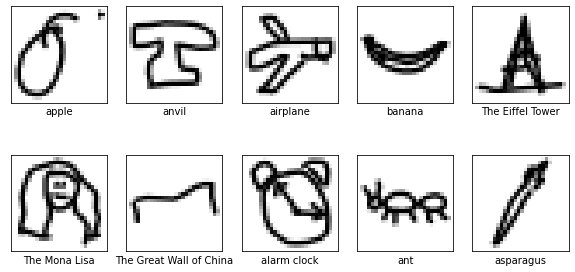

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [ ]:
# Need this line to randomly shuffle both the X & y at the same time
# keras validation split uses the end % of the dataframe

from sklearn.utils import shuffle
X, y = shuffle(X, y)

# Normalize data
X = X.astype('float32')/255

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [ ]:
from tensorflow import keras
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# create model to be built one layer at a time
model = Sequential()

In [ ]:
# Input layer = hidden layer 1
model.add(Dense(units=64, input_dim=784, activation='relu', name='Input_Layer'))

#HL 2
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# baseline holds the epoch information from the model
baseline = model.fit(X, y,
            epochs=12,
            batch_size=32,
            validation_split=.2
            )

Epoch 1/12
2500/2500 [==============================] - 5s 2ms/step - loss: 1.4518 - accuracy: 0.5381 - val_loss: 0.8380 - val_accuracy: 0.7547
Epoch 2/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7819 - accuracy: 0.7717 - val_loss: 0.7275 - val_accuracy: 0.7889
Epoch 3/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6841 - accuracy: 0.8010 - val_loss: 0.6672 - val_accuracy: 0.8052
Epoch 4/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6193 - accuracy: 0.8168 - val_loss: 0.6255 - val_accuracy: 0.8166
Epoch 5/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5752 - accuracy: 0.8315 - val_loss: 0.5924 - val_accuracy: 0.8245
Epoch 6/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5503 - accuracy: 0.8373 - val_loss: 0.5686 - val_accuracy: 0.8304
Epoch 7/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5282 - accuracy: 0.8451 - val_loss: 0.5592 - val_accuracy:

In [ ]:
model.evaluate(X, y)

3125/3125 [==============================] - 4s 1ms/step - loss: 0.4430 - accuracy: 0.8702


[0.4429953396320343, 0.8702099919319153]

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [ ]:
# baseline.history

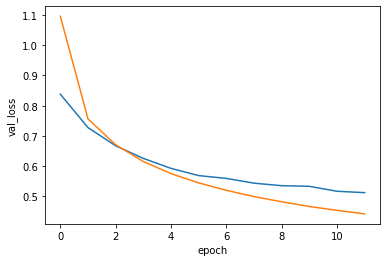

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

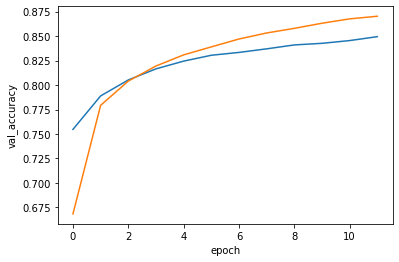

In [ ]:
df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_accuracy', data=df)
ax = sns.lineplot(x='epoch', y='accuracy', data=df);

My graph suggests that the second epoch is the best model. The output accuracy on the validation data improved little after the second epoch.

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam()

In [ ]:
# create model to be built one layer at a time
model_a = Sequential()

In [ ]:
# Input layer = hidden layer 1
model_a.add(Dense(units=64, input_dim=784, activation='relu', name='Input_Layer'))

#HL 2
model_a.add(Dense(units=32, activation='relu'))

# Output layer
model_a.add(Dense(units=10, activation='softmax'))

In [ ]:
model_a.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_a.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# baseline holds the epoch information from the model
baseline_a = model_a.fit(X, y,
            epochs=12,
            batch_size=32,
            validation_split=.2
            )

Epoch 1/12
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8987 - accuracy: 0.7208 - val_loss: 0.5779 - val_accuracy: 0.8253
Epoch 2/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5378 - accuracy: 0.8389 - val_loss: 0.5202 - val_accuracy: 0.8425
Epoch 3/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4570 - accuracy: 0.8625 - val_loss: 0.4989 - val_accuracy: 0.8522
Epoch 4/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4233 - accuracy: 0.8723 - val_loss: 0.5086 - val_accuracy: 0.8470
Epoch 5/12
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3980 - accuracy: 0.8798 - val_loss: 0.5012 - val_accuracy: 0.8502
Epoch 6/12
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3776 - accuracy: 0.8864 - val_loss: 0.4903 - val_accuracy: 0.8540
Epoch 7/12
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3536 - accuracy: 0.8935 - val_loss: 0.4969 - val_accuracy:

In [ ]:
model_a.evaluate(X, y)

3125/3125 [==============================] - 5s 1ms/step - loss: 0.3335 - accuracy: 0.8995


[0.33350539207458496, 0.8994899988174438]

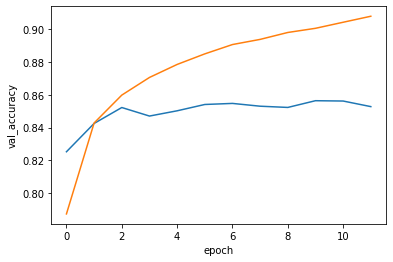

In [ ]:
df = pd.DataFrame.from_records(baseline_a.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_accuracy', data=df)
ax = sns.lineplot(x='epoch', y='accuracy', data=df);

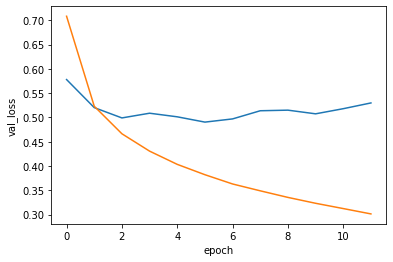

In [ ]:
df = pd.DataFrame.from_records(baseline_a.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why?

sparse_catagorical_crossentropy is the preferred function for calculating loss on with integers for category labels. It measures the performance of probability outcomes (0.0-1.0) for classification models.

2. What is the difference between a loss function and a metric? Why might we need both in Keras? 

A loss function is one of the features optimized in a model, the metric is a set of parameters used to evaluate the performance of a model. The loss function is used to refine/optimize the model, which is important for outcome generation. The metric provides information about how the model is performing, which helps us determine if further changes need to be made.

3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

SGD has a constant learning rate, it stays the same, regardless of the training the model has done. ADAM, adjusts the learning rate based upon model discoveries.

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)